## LAB6:  k-MEANS Part 2

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans 
import pandas as pd
from sklearn.metrics import silhouette_samples, silhouette_score
from tqdm import tqdm

In [ ]:
#load image
image_path = 'photo1.jpg'
image = cv2.imread(image_path)
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

In [ ]:
print(image.shape)

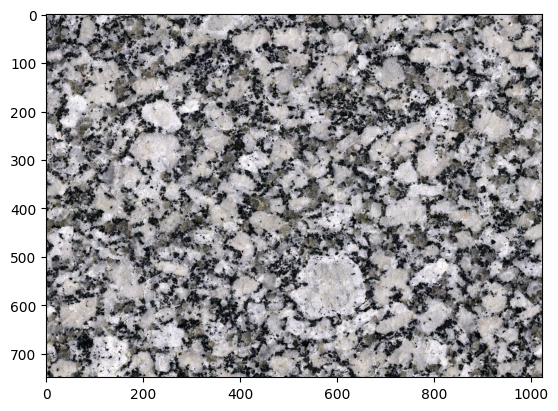

In [5]:
plt.imshow(image)
plt.show()

In [6]:
pixels = image.reshape(-1,3)

In [31]:
pixels.shape

(766976, 3)

In [8]:
num_clusters = 4
kmeans = KMeans(n_clusters = num_clusters, random_state= 42)

In [9]:
kmeans.fit(pixels)

C:\Users\rijan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

In [10]:
labels = kmeans.labels_

In [11]:
cluster_centers = kmeans.cluster_centers_

In [12]:
np.rint(cluster_centers)

array([[206., 202., 206.],
       [ 28.,  29.,  30.],
       [ 99.,  98.,  99.],
       [159., 157., 160.]])

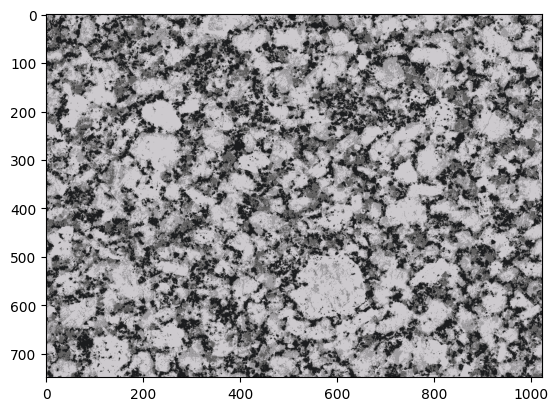

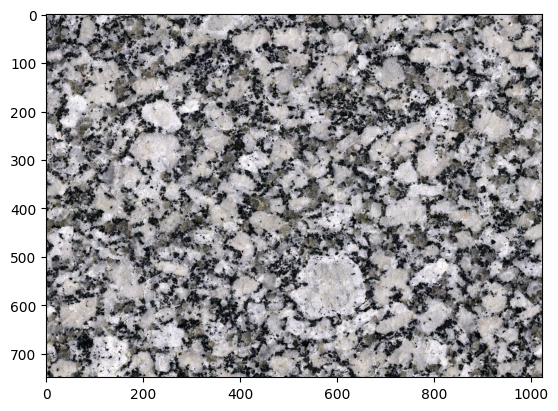

In [13]:
clustered_image = cluster_centers[labels].astype(np.uint8).reshape(image.shape)

plt.imshow(clustered_image)

plt.show()

plt.imshow(image)
plt.show()

In [14]:
cluster_sizes = np.bincount(labels, minlength = num_clusters)
total_pixels = labels.size
percentage_pixels = (cluster_sizes /total_pixels)*100

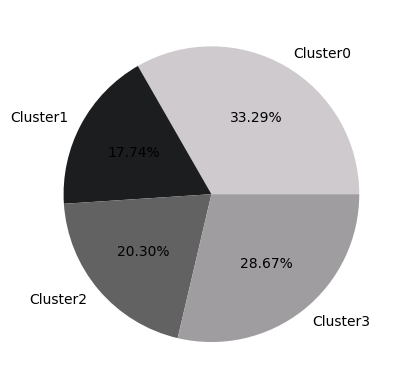

In [15]:
plt.pie(percentage_pixels,colors=np.array(cluster_centers/255),labels=[f"Cluster{i}" for i in range(num_clusters)], autopct = '%.2f%%')
plt.show()

In [16]:
cluster_data ={
    'Cluster':range(num_clusters),
    'Pixel_Count' : cluster_sizes,
    'Red':cluster_centers[:,0],
    'Blue':cluster_centers[:,1],
    'Green':cluster_centers[:,2]
}
cluster_dataframe = pd.DataFrame(cluster_data)

cluster_dataframe.set_index('Cluster', inplace = True)
cluster_dataframe

,Pixel_Count,Red,Blue,Green
Cluster,,,,
0,255332,205.714607,202.255640,206.156569
1,136083,27.640156,28.759215,30.276728
2,155685,99.277318,98.222660,98.898298
3,219876,158.761530,156.565826,159.967365


In [17]:
pixel_sum = sum(cluster_dataframe['Pixel_Count'])

In [25]:
print(f'{int(percentage_pixels[1])}% of mica is present in the granite ')

17% of mica is present in the granite 


In [26]:
# Calculate WCSS for different k values
wcss = []
for k in range(2,15):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(pixels)
    wcss.append(kmeans.inertia_)

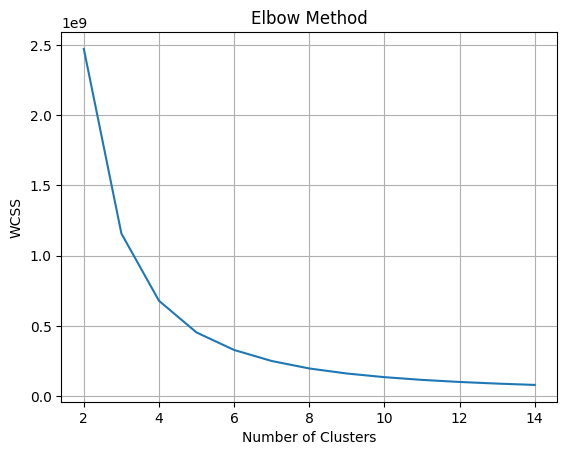

In [27]:
# Plot the elbow method graph
plt.plot(range(2, 15), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()


In [60]:
n_clusters = range(3,5)
silhouette_values = {}
silhouette_values = np.array(silhouette_values)
for num_clusters in n_clusters:
    # Perform KMeans clustering
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    labels = kmeans.fit_predict(pixels)

    # Calculate silhouette score
    silhouette_avg = silhouette_score(pixels, labels)
    print(f"Silhouette Score for {num_clusters} clusters: {silhouette_avg}")

    # Calculate silhouette values for  each data point
    silhouette_values = silhouette_samples(pixels, labels)

C:\Users\rijan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for 3 clusters: 0.587393963448365


C:\Users\rijan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for 4 clusters: 0.5442280436208728


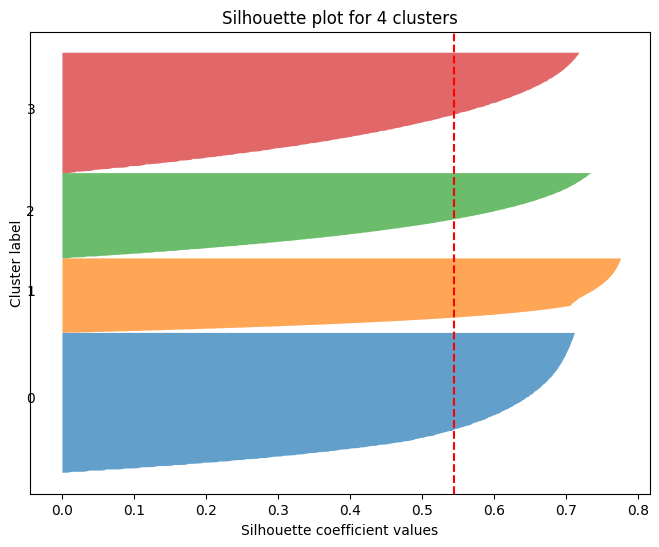

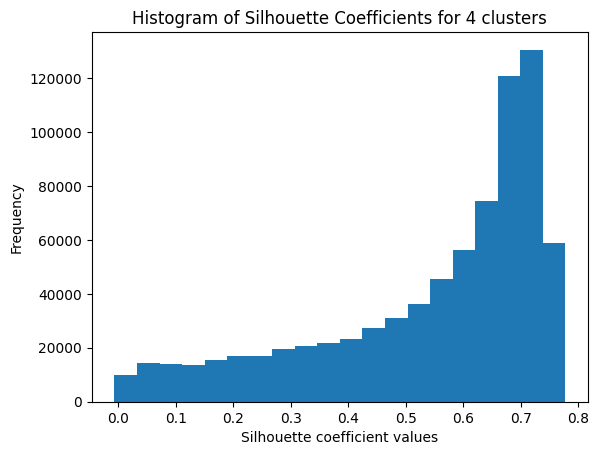

In [66]:
# Create a silhouette plot
plt.figure(figsize=(8, 6))
y_lower = 10

for i in range(num_clusters):
    cluster_silhouette_values = silhouette_values[labels == i]
    cluster_silhouette_values.sort()
    cluster_size = cluster_silhouette_values.shape[0]
    y_upper = y_lower + cluster_size

    plt.fill_betweenx(np.arange(y_lower, y_upper), 0, cluster_silhouette_values, alpha=0.7)
    plt.text(-0.05, y_lower + 0.5 * cluster_size, str(i))
  
    y_lower = y_upper + 10
    
plt.xlabel("Silhouette coefficient values")
plt.ylabel("Cluster label")
plt.title(f"Silhouette plot for {num_clusters} clusters")
plt.axvline(x=silhouette_avg, color="red", linestyle="--")
plt.yticks([])
plt.show()

# Create a histogram of silhouette values
plt.hist(silhouette_values, bins=20)
plt.xlabel("Silhouette coefficient values")
plt.ylabel("Frequency")
plt.title(f"Histogram of Silhouette Coefficients for {num_clusters} clusters")
plt.show()